In [2]:
import numpy as np
import pandas as pd
import posixpath as px
from info_vis import preprocessing, PROJECT_PATH, DATA_PATH, OUTPUT_DATA_PATH

In [4]:
filename = "World_Wide_Unicorn_Startups.csv"
unicorn_startups_df = pd.read_csv(px.join(DATA_PATH, filename))
unicorn_startups_df

Company  Valuation        Country           City  \
0           Red Ventures       1.00  United States      Fort Mill   
1                 Tanium       9.00  United States       Kirkland   
2            Planet Labs       2.20  United States  San Francisco   
3                Illumio       2.75  United States      Sunnyvale   
4              Infinidat       1.60  United States        Waltham   
..                   ...        ...            ...            ...   
676           Pet Circle       1.00      Australia     Alexandria   
677         Pristyn Care       1.20          India       Gurugram   
678  Incode Technologies       1.25  United States  San Francisco   
679            AgentSync       1.20  United States         Denver   
680             Anyscale       1.00  United States       Berkeley   

                            Industry  Year  
0                              Other  2015  
1                      Cybersecurity  2015  
2                              Other  2015  
3                      Cybersecurity  2015  
4                           Hardware  2015  
..                               ...   ...  
676  E-commerce & direct-to-consumer  2021  
677                           Health  2021  
678                    Cybersecurity  2021  
679                          Fintech  2021  
680          Artificial intelligence  2021  

[681 rows x 6 columns]

In [6]:
filename = "QOL.csv"
quality_life_df = pd.read_csv(px.join(DATA_PATH, filename))
quality_life_df


Country  Quality of Life Index  Purchasing Power Index  \
0               Argentina                   77.0                    59.4   
1               Australia                  180.8                   110.4   
2                 Austria                  182.6                   104.6   
3                 Belgium                  136.0                    86.2   
4                  Brazil                   29.8                    41.2   
..                    ...                    ...                     ...   
219                Sweden                  171.4                    90.6   
220           Switzerland                  190.8                   111.0   
221              Thailand                  100.3                    31.4   
222  United Arab Emirates                  156.0                    85.7   
223         United States                  167.0                   102.6   

     Cost of Living Index  Property Price to Income Ratio  Year  \
0                    67.1                            11.6  2015   
1                    99.3                             7.1  2015   
2                    76.9                             9.6  2015   
3                    87.2                             6.5  2015   
4                    55.3                            16.7  2015   
..                    ...                             ...   ...   
219                  79.2                             8.6  2021   
220                 131.7                             8.4  2021   
221                  49.3                            22.2  2021   
222                  61.7                             4.9  2021   
223                  71.9                             4.0  2021   

     GDP per Capita  
0      14833.199680  
1      52009.802759  
2      43908.420277  
3      40889.673570  
4       8936.195589  
..              ...  
219    61173.088630  
220    93638.127634  
221     7058.069402  
222    42412.581159  
223    69617.531988  

[224 rows x 7 columns]

In [22]:
merged_df = pd.merge(unicorn_startups_df, quality_life_df, on=['Country', 'Year'], how='inner')  
merged_df

Company  Valuation        Country           City  \
0           Red Ventures       1.00  United States      Fort Mill   
1                 Tanium       9.00  United States       Kirkland   
2            Planet Labs       2.20  United States  San Francisco   
3                Illumio       2.75  United States      Sunnyvale   
4              Infinidat       1.60  United States        Waltham   
..                   ...        ...            ...            ...   
676           Pet Circle       1.00      Australia     Alexandria   
677         Pristyn Care       1.20          India       Gurugram   
678  Incode Technologies       1.25  United States  San Francisco   
679            AgentSync       1.20  United States         Denver   
680             Anyscale       1.00  United States       Berkeley   

                            Industry  Year  Quality of Life Index  \
0                              Other  2015                  192.5   
1                      Cybersecurity  2015                  192.5   
2                              Other  2015                  192.5   
3                      Cybersecurity  2015                  192.5   
4                           Hardware  2015                  192.5   
..                               ...   ...                    ...   
676  E-commerce & direct-to-consumer  2021                  181.5   
677                           Health  2021                  104.5   
678                    Cybersecurity  2021                  167.0   
679                          Fintech  2021                  167.0   
680          Artificial intelligence  2021                  167.0   

     Purchasing Power Index  Cost of Living Index  \
0                     126.1                  76.5   
1                     126.1                  76.5   
2                     126.1                  76.5   
3                     126.1                  76.5   
4                     126.1                  76.5   
..                      ...                   ...   
676                    99.3                  84.1   
677                    47.1                  25.2   
678                   102.6                  71.9   
679                   102.6                  71.9   
680                   102.6                  71.9   

     Property Price to Income Ratio  GDP per Capita  
0                               2.6    56097.922641  
1                               2.6    56097.922641  
2                               2.6    56097.922641  
3                               2.6    56097.922641  
4                               2.6    56097.922641  
..                              ...             ...  
676                             7.4    67440.576451  
677                            11.3     2257.365145  
678                             4.0    69617.531988  
679                             4.0    69617.531988  
680                             4.0    69617.531988  

[681 rows x 11 columns]

In [90]:
qol_acs = merged_df.groupby('Country')['Quality of Life Index'] \
                      .mean() \
                      .reset_index() \
                      .sort_values(by='Quality of Life Index', ascending=False)
qol_acs.head(10)

Country  Quality of Life Index
28  Switzerland             197.775000
9       Denmark             190.000000
10      Finland             189.050000
21  Netherlands             185.140000
1     Australia             184.300000
2       Austria             182.400000
12      Germany             180.856522
27       Sweden             173.833333
22       Norway             173.600000
17        Japan             171.600000

In [88]:
company_asc = merged_df.groupby('Country')['Company'] \
                      .count() \
                      .reset_index() \
                      .sort_values(by='Company', ascending=False)
company_asc.head(10)

Country  Company
31  United States      463
13          India       48
12        Germany       23
16         Israel       21
11         France       18
4          Brazil       15
5          Canada       15
24      Singapore       11
17          Japan        6
1       Australia        6

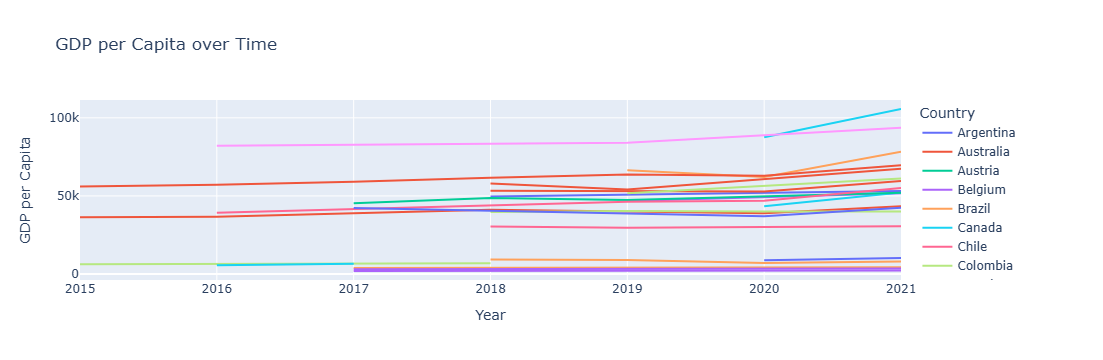

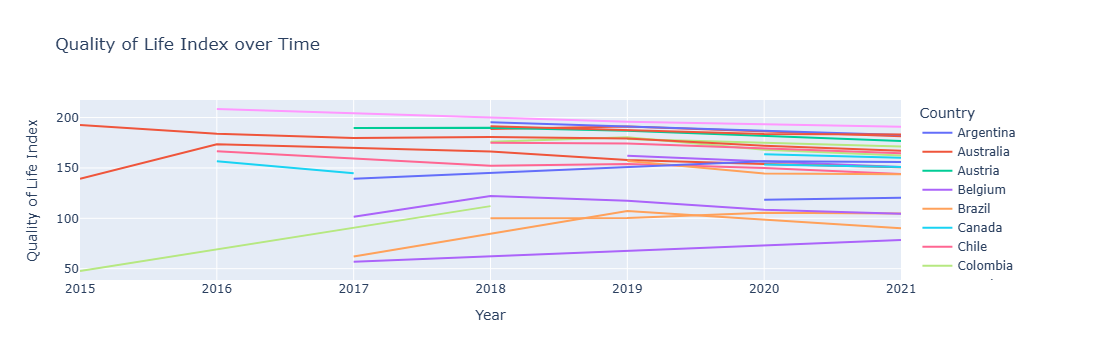

In [40]:
import plotly.express as px

avg_trends = merged_df.groupby(['Country', 'Year']).agg({
    'Company': 'count',
    'Valuation': 'sum',
    'GDP per Capita': 'mean',
    'Quality of Life Index': 'mean'
}).reset_index()

# GDP per Capita trend
fig = px.line(avg_trends, x='Year', y='GDP per Capita', color='Country',
              title='GDP per Capita over Time')
fig.show()

# Quality of Life trend
fig = px.line(avg_trends, x='Year', y='Quality of Life Index', color='Country',
              title='Quality of Life Index over Time')
fig.show()

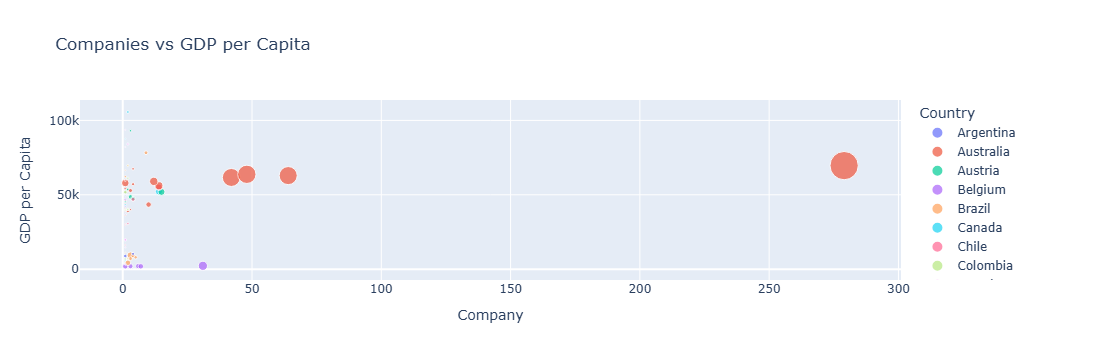

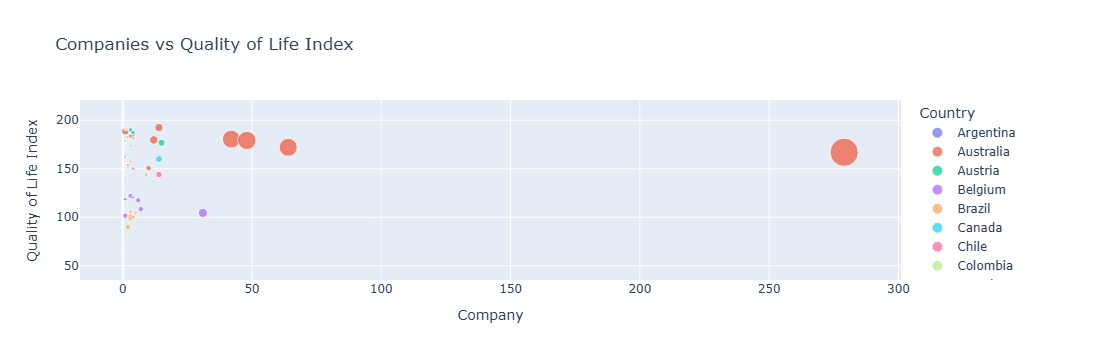

In [42]:
fig = px.scatter(avg_trends, x='Company', y='GDP per Capita',
                 size='Valuation', color='Country',
                 title='Companies vs GDP per Capita')
fig.show()

fig = px.scatter(avg_trends, x='Company', y='Quality of Life Index',
                 size='Valuation', color='Country',
                 title='Companies vs Quality of Life Index')
fig.show()

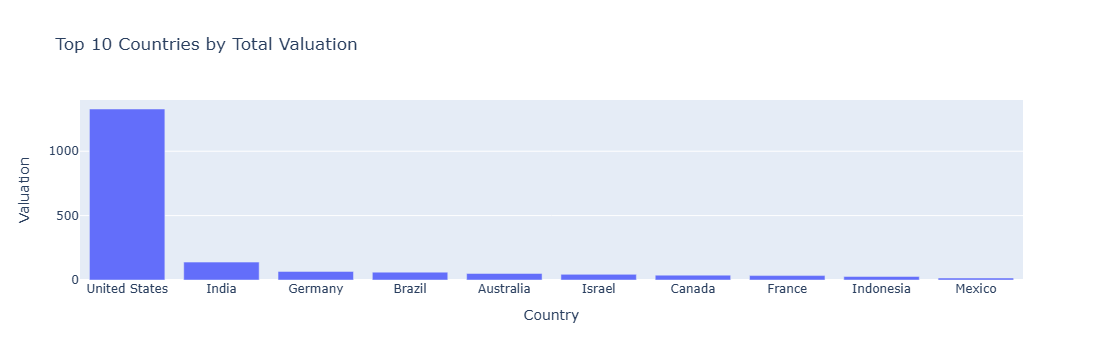

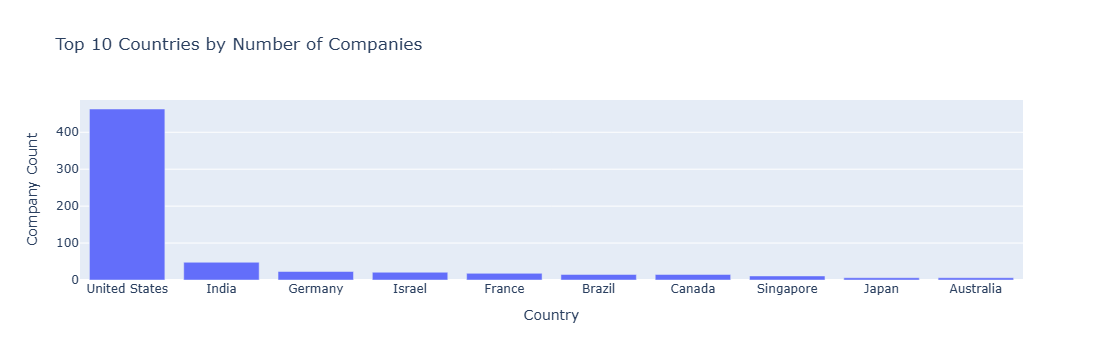

In [128]:
top_vals = merged_df.groupby('Country')['Valuation'].sum().reset_index()
top_vals = top_vals.sort_values(by='Valuation', ascending=False)

fig = px.bar(top_vals.head(10), x='Country', y='Valuation',
             title='Top 10 Countries by Total Valuation')
fig.show()

top_counts = merged_df.groupby('Country')['Company'].count().reset_index(name='Company Count')

# Sort and take top 10
top_counts = top_counts.sort_values(by='Company Count', ascending=False)

# Plot
fig1 = px.bar(top_counts.head(10), x='Country', y='Company Count',
             title='Top 10 Countries by Number of Companies')
fig1.show()

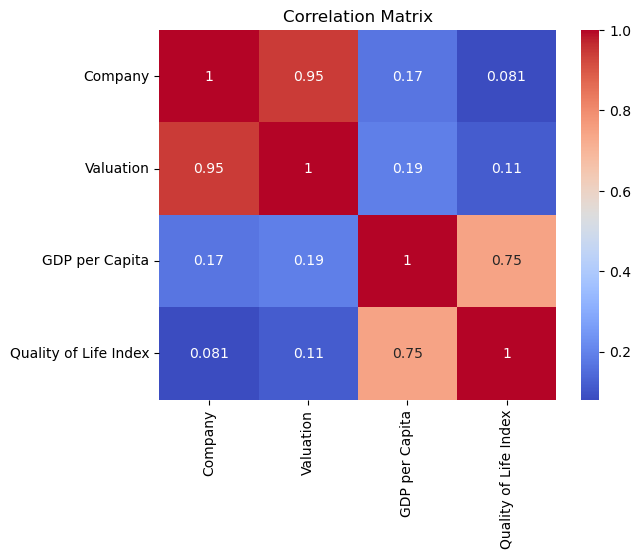

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = grouped[['Company', 'Valuation', 'GDP per Capita', 'Quality of Life Index']]
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

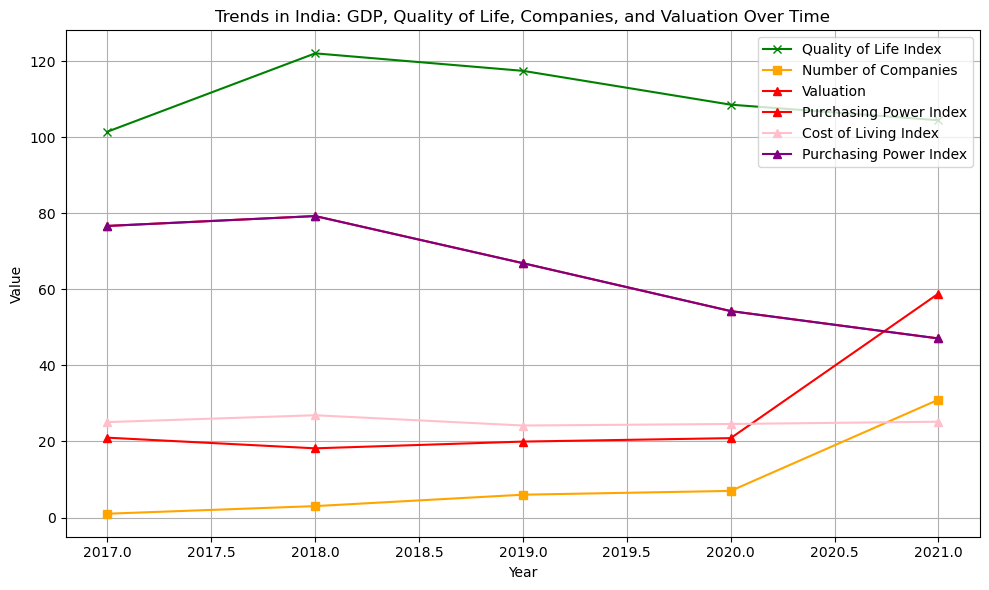

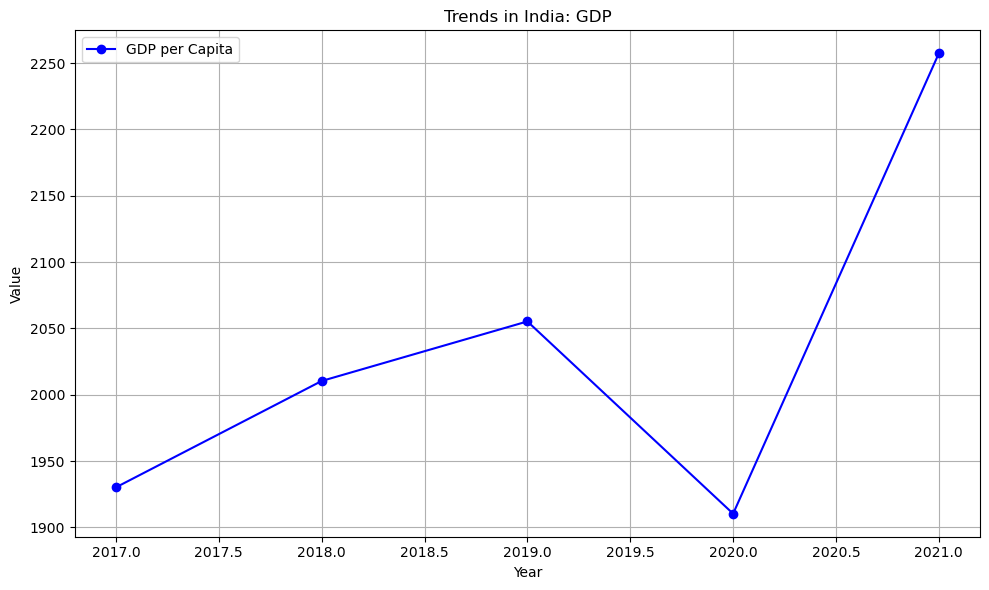

In [80]:
import pandas as pd
import matplotlib.pyplot as plt


country_name = "India"  
country_df = merged_df[merged_df['Country'] == country_name]


df_agg = country_df.groupby('Year').agg({
    'Valuation': 'sum',
    'Company': 'count',
    'GDP per Capita': 'mean',
    'Quality of Life Index': 'mean',
    'Purchasing Power Index': 'mean'	,
    'Cost of Living Index': 'mean'	,
    'Property Price to Income Ratio': 'mean'	
}).reset_index()


plt.figure(figsize=(10, 6))

#plt.plot(df_agg['Year'], df_agg['GDP per Capita'], label='GDP per Capita', color='blue', marker='o')
plt.plot(df_agg['Year'], df_agg['Quality of Life Index'], label='Quality of Life Index', color='green', marker='x')
plt.plot(df_agg['Year'], df_agg['Company'], label='Number of Companies', color='orange', marker='s')
plt.plot(df_agg['Year'], df_agg['Valuation'], label='Valuation', color='red', marker='^')
plt.plot(df_agg['Year'], df_agg['Purchasing Power Index'], label='Purchasing Power Index', color='red', marker='^')
plt.plot(df_agg['Year'], df_agg['Cost of Living Index'], label='Cost of Living Index', color='pink', marker='^')
plt.plot(df_agg['Year'], df_agg['Purchasing Power Index'], label='Purchasing Power Index', color='purple', marker='^')



plt.title(f'Trends in {country_name}: GDP, Quality of Life, Companies, and Valuation Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(df_agg['Year'], df_agg['GDP per Capita'], label='GDP per Capita', color='blue', marker='o')


plt.title(f'Trends in {country_name}: GDP')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
print(df_agg[['Year', 'Valuation']])

   Year  Valuation
0  2017      21.00
1  2018      18.20
2  2019      19.97
3  2020      20.88
4  2021      58.90


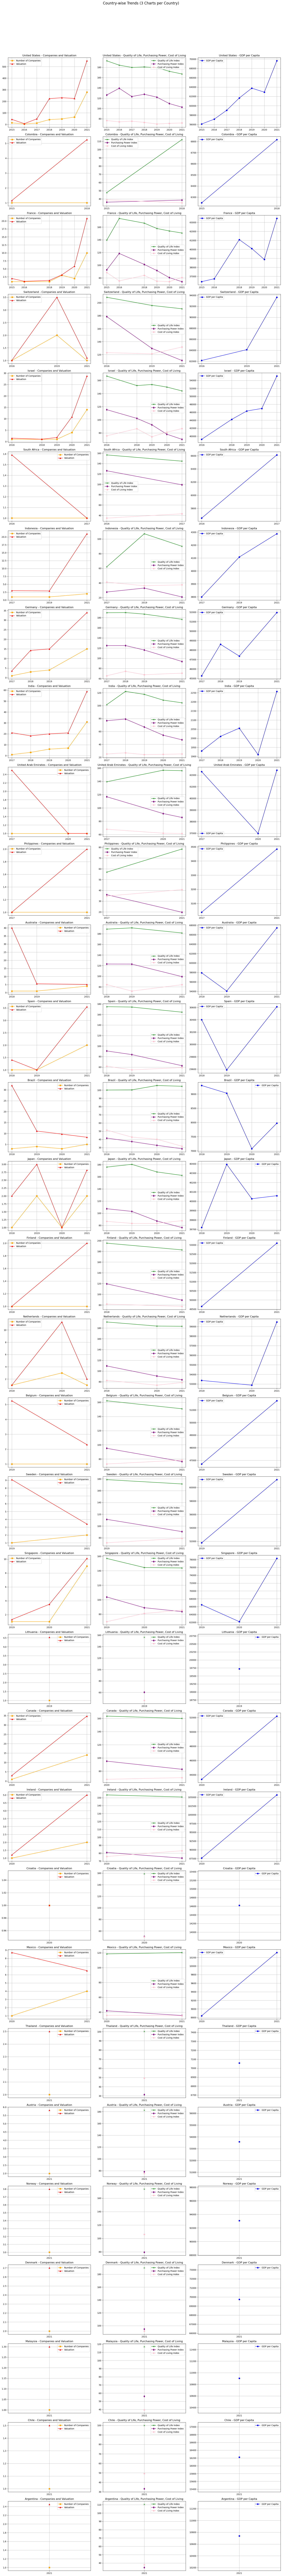

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Valuation is numeric
merged_df['Valuation'] = pd.to_numeric(merged_df['Valuation'], errors='coerce')

# Clean up Year column by rounding any float years and casting to int
merged_df['Year'] = merged_df['Year'].apply(lambda x: round(x)).astype(int)

# Get list of unique countries
countries = merged_df['Country'].unique()
num_countries = len(countries)

# Plot setup: 3 subplots (stacked) per country
fig, axes = plt.subplots(num_countries, 3, figsize=(18, num_countries * 5), sharex=False)
if num_countries == 1:
    axes = [axes]

# Loop through each country
for i, country in enumerate(countries):
    country_df = merged_df[merged_df['Country'] == country]

    # Aggregate per year
    df_agg = country_df.groupby('Year').agg({
        'Valuation': 'sum',
        'Company': 'count',
        'GDP per Capita': 'mean',
        'Quality of Life Index': 'mean',
        'Purchasing Power Index': 'mean',
        'Cost of Living Index': 'mean'
    }).reset_index()

    # Plot 1: Number of Companies and Valuation
    ax0 = axes[i][0] if num_countries > 1 else axes[0]
    ax0.plot(df_agg['Year'], df_agg['Company'], label='Number of Companies', color='orange', marker='s')
    ax0.plot(df_agg['Year'], df_agg['Valuation'], label='Valuation', color='red', marker='^')
    ax0.set_title(f"{country} - Companies and Valuation")
    ax0.legend()
    ax0.grid(True)
    
    # Plot 2: Quality of Life Index, Purchasing Power, Cost of Living
    ax1 = axes[i][1] if num_countries > 1 else axes[1]
    #ax1.plot(df_agg['Year'], df_agg['Company'], label='Number of Companies', color='orange', marker='s')
    #ax1.plot(df_agg['Year'], df_agg['Valuation'], label='Valuation', color='red', marker='^')
    ax1.plot(df_agg['Year'], df_agg['Quality of Life Index'], label='Quality of Life Index', color='green', marker='x')
    ax1.plot(df_agg['Year'], df_agg['Purchasing Power Index'], label='Purchasing Power Index', color='purple', marker='d')
    ax1.plot(df_agg['Year'], df_agg['Cost of Living Index'], label='Cost of Living Index', color='pink', marker='o')
    ax1.set_title(f"{country} - Quality of Life, Purchasing Power, Cost of Living")
    ax1.legend()
    ax1.grid(True)

    # Plot 3: GDP per Capita
    ax2 = axes[i][2] if num_countries > 1 else axes[2]
    ax2.plot(df_agg['Year'], df_agg['GDP per Capita'], label='GDP per Capita', color='blue', marker='o')
    ax2.set_title(f"{country} - GDP per Capita")
    ax2.legend()
    ax2.grid(True)

    # Ensure the x-axis has only integer years
    ax0.set_xticks(df_agg['Year'])
    ax1.set_xticks(df_agg['Year'])
    ax2.set_xticks(df_agg['Year'])

# Final layout
plt.tight_layout()
plt.suptitle("Country-wise Trends (3 Charts per Country)", fontsize=16, y=1.02)
plt.subplots_adjust()
plt.show()
